In [ ]:
Contribution
- Christi Vidya M : clustering(ipynb+ppt), presentator
- Dormauli Sinta : visualisasi(ipynb+ppt), mengedit ppt
- Febri Ramayanti : clustering(ipynb+ppt), mengedit ipynb
- Krisdayanti Lamtiur : visualisasi(ipynb+ppt), presentator
- M. Farhan Alfarizi : preprocessing(ipynb+ppt), mengedit video
- Rindang Eka : preprocessing(ipynb+ppt), presentator
- Riska Ramadani : clustering(ipynb+ppt), mengedit ipynb
- Theo Andita : preprocessing(ipynb+ppt), mengedit ppt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [5]:
import io

In [6]:
data = pd.read_csv(io.BytesIO(uploaded['online_shoppers_intention.csv']))

In [7]:
#melihat ukuran data
print(type(data))
N, P = data.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 12330, ', Kolom = ', 18)

In [8]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
#removing variables
data.drop("Administrative", axis=1, inplace=True)
data.drop("Informational", axis=1, inplace=True)
data.drop("ProductRelated", axis=1, inplace=True)

In [10]:
#melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative_Duration  12316 non-null  float64
 1   Informational_Duration   12316 non-null  float64
 2   ProductRelated_Duration  12316 non-null  float64
 3   BounceRates              12316 non-null  float64
 4   ExitRates                12316 non-null  float64
 5   PageValues               12330 non-null  float64
 6   SpecialDay               12330 non-null  float64
 7   Month                    12330 non-null  object 
 8   OperatingSystems         12330 non-null  int64  
 9   Browser                  12330 non-null  int64  
 10  Region                   12330 non-null  int64  
 11  TrafficType              12330 non-null  int64  
 12  VisitorType              12330 non-null  object 
 13  Weekend                  12330 non-null  bool   
 14  Revenue               

memperbaiki tipe data

In [11]:
data['Month']=data['Month'].astype('category')
data['VisitorType']=data['VisitorType'].astype('category')
data['TrafficType']=data['TrafficType'].astype('category')
data['OperatingSystems']=data['OperatingSystems'].astype('category')
data['Browser']=data['Browser'].astype('category')
data['Region']=data['Region'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative_Duration  12316 non-null  float64 
 1   Informational_Duration   12316 non-null  float64 
 2   ProductRelated_Duration  12316 non-null  float64 
 3   BounceRates              12316 non-null  float64 
 4   ExitRates                12316 non-null  float64 
 5   PageValues               12330 non-null  float64 
 6   SpecialDay               12330 non-null  float64 
 7   Month                    12330 non-null  category
 8   OperatingSystems         12330 non-null  category
 9   Browser                  12330 non-null  category
 10  Region                   12330 non-null  category
 11  TrafficType              12330 non-null  category
 12  VisitorType              12330 non-null  category
 13  Weekend                  12330 non-null  bool    
 14  Revenu

Missing value

In [12]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [13]:
missing_data(data)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Total,14,14,14,14,14,0,0,0,0,0,0,0,0,0,0
Percent,0.113544,0.113544,0.113544,0.113544,0.113544,0,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,category,category,category,category,category,category,bool,bool


In [14]:
data = data.dropna()

In [15]:
data.shape

(12316, 15)

menghilangkan noise (durasi yng bernilai negatif)

In [16]:
data = data.drop(data[data.Administrative_Duration< 0].index)
data = data.drop(data[data.Informational_Duration< 0].index)
data = data.drop(data[data.ProductRelated_Duration< 0].index)

In [17]:
data.shape

(12283, 15)

Outliers?

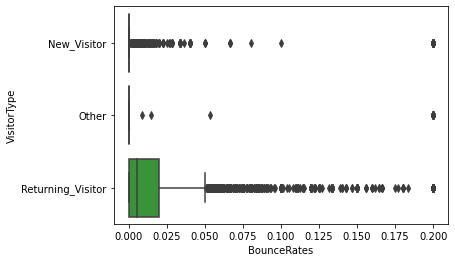

In [18]:
bp1 = sns.boxplot(x="BounceRates",y="VisitorType" ,data=data)

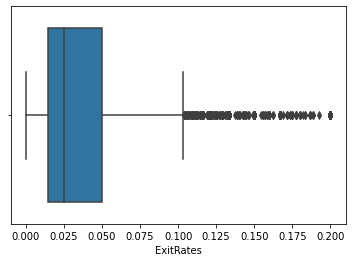

In [19]:
bp2 = sns.boxplot(x="ExitRates",data=data)

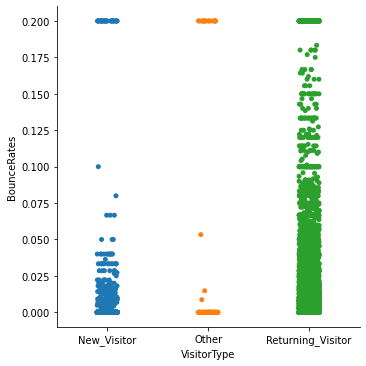

In [20]:
plotbounceratesandvisitor=sns.catplot(x="VisitorType",y="BounceRates",data=data)

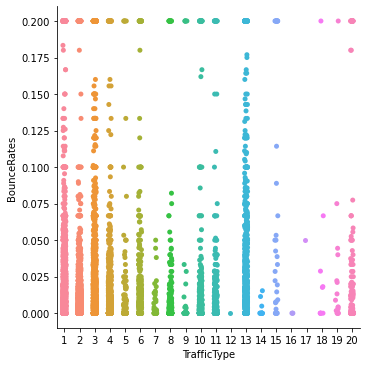

In [21]:
plotbounceratesandvisitor=sns.catplot(x="TrafficType",y="BounceRates",data=data)

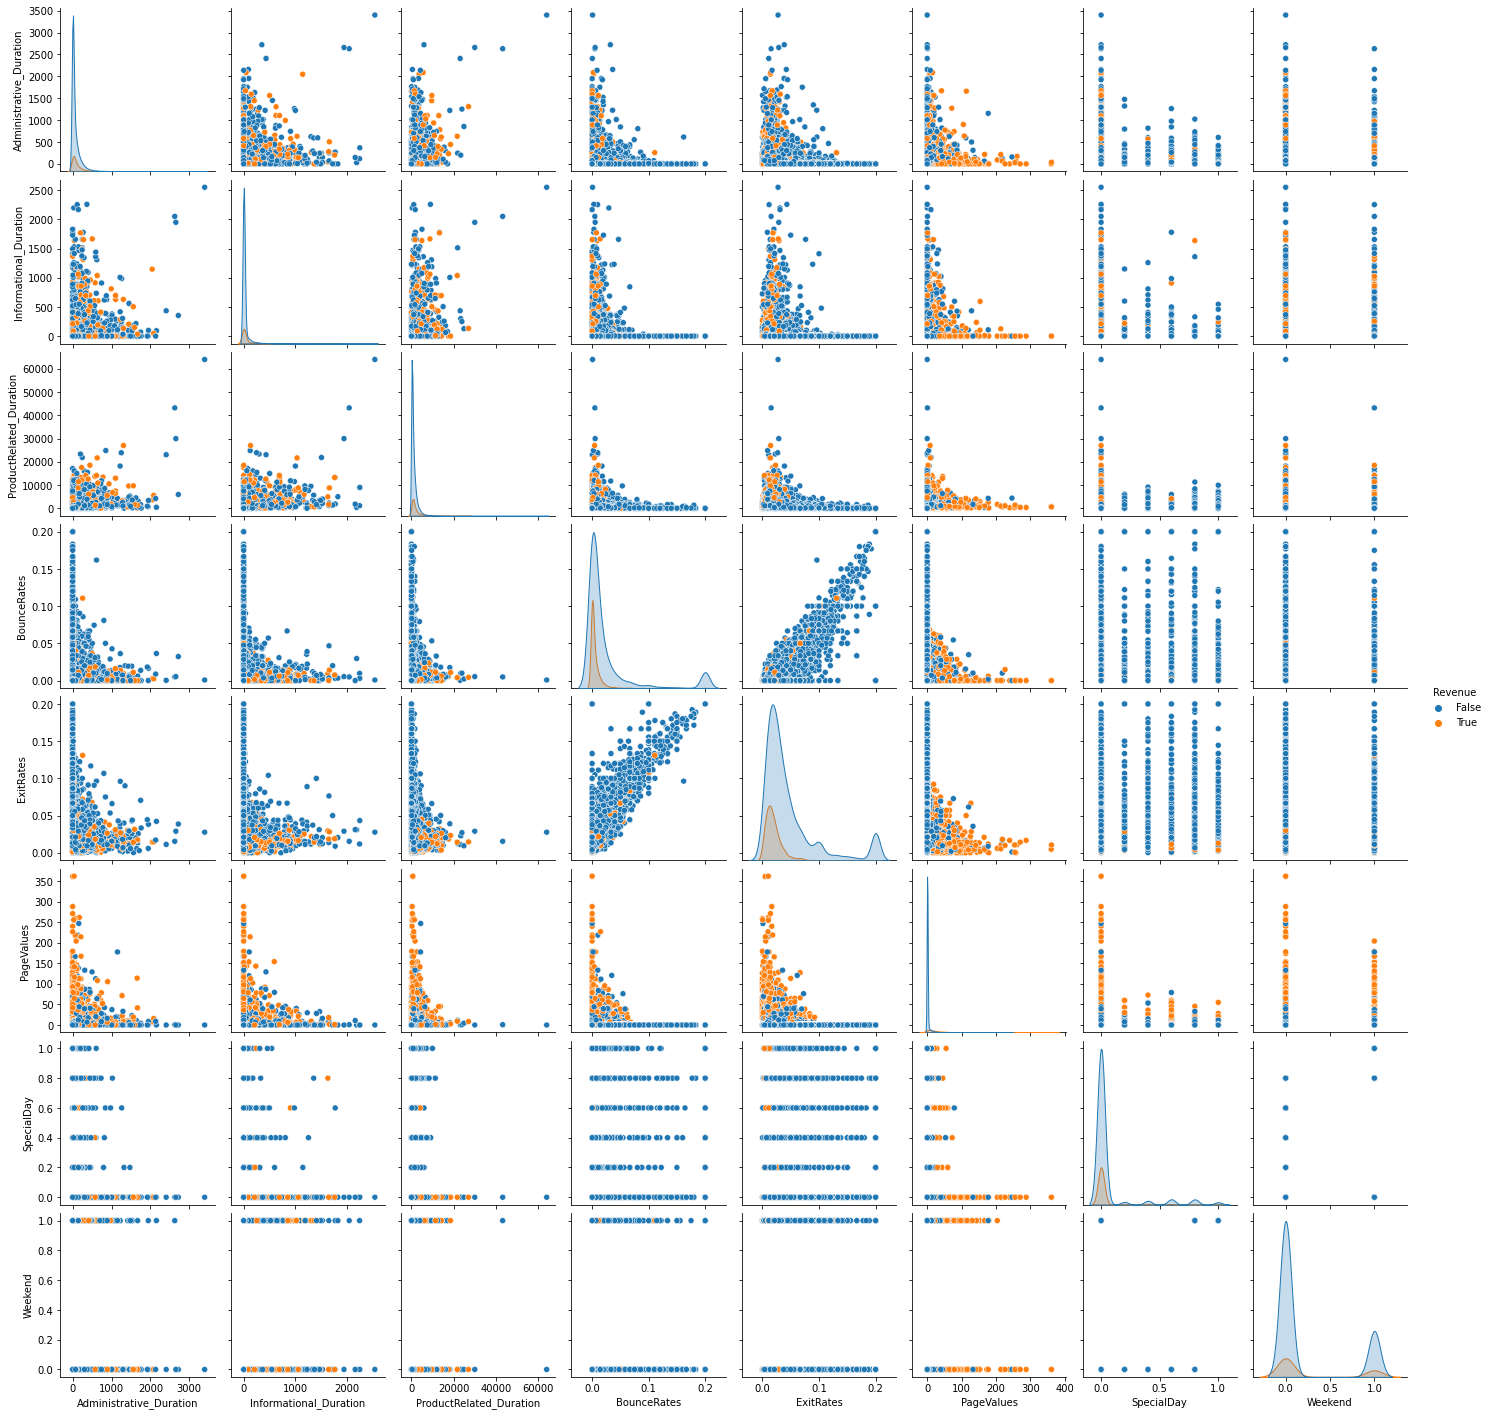

In [22]:
g = sns.pairplot(data, hue="Revenue")

Standarisasi data numerik

In [23]:
import sklearn
from sklearn import preprocessing as per

In [24]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_cat = data.select_dtypes(include = ['category','bool'])

In [25]:
scaler=per.MinMaxScaler(feature_range=(0,1))
rescaleData=scaler.fit_transform(data_num)
rescaleData=pd.DataFrame(rescaleData,index=data_num.index,columns=data_num.columns)
print(rescaleData)

       Administrative_Duration  Informational_Duration  ...  PageValues  SpecialDay
0                     0.000000                     0.0  ...    0.000000         0.0
1                     0.000000                     0.0  ...    0.000000         0.0
3                     0.000000                     0.0  ...    0.000000         0.0
4                     0.000000                     0.0  ...    0.000000         0.0
5                     0.000000                     0.0  ...    0.000000         0.0
...                        ...                     ...  ...         ...         ...
12325                 0.042663                     0.0  ...    0.033839         0.0
12326                 0.000000                     0.0  ...    0.000000         0.0
12327                 0.000000                     0.0  ...    0.000000         0.0
12328                 0.022067                     0.0  ...    0.000000         0.0
12329                 0.000000                     0.0  ...    0.000000     

In [26]:
data2 = pd.concat([rescaleData, data_cat], axis = 1)
data2.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.002411,0.078947,0.122807,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


**VISUALISASI**

**Uni-Variate Analysis of the Data**

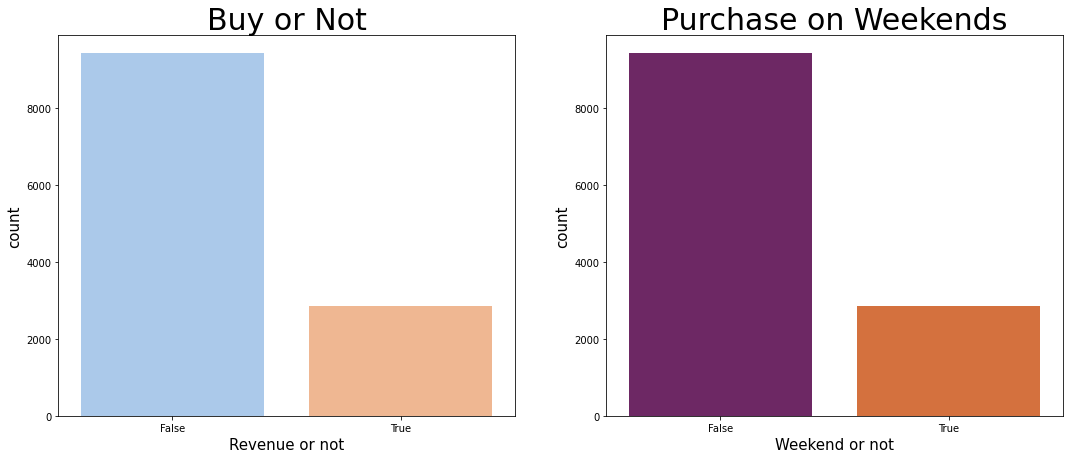

In [27]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

DARI HASIL GRAFIK PERTAMA DAPAT KITA LIHAT BAHWA KUNJUNGAN SHOPPER LEBIH BANYAK TIDAK BERAKHIR DENGAN TRANSAKSI. UNTUK MELIHAT PENYEBAB KURANGNYA MINAT SHOPPER UNTUK MEMBELI, MAKA KITA AKAN MELIHAT DARI VARIABEL LAINNYA.

DARI HASIL GRAFIK KEDUA,BANYAKNYA SHOPPER MENGUNJUNGI ONLINE SHOP PADA WEEKDAYS.

In [28]:
data['VisitorType'].value_counts()

Returning_Visitor    10504
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

No handles with labels found to put in legend.


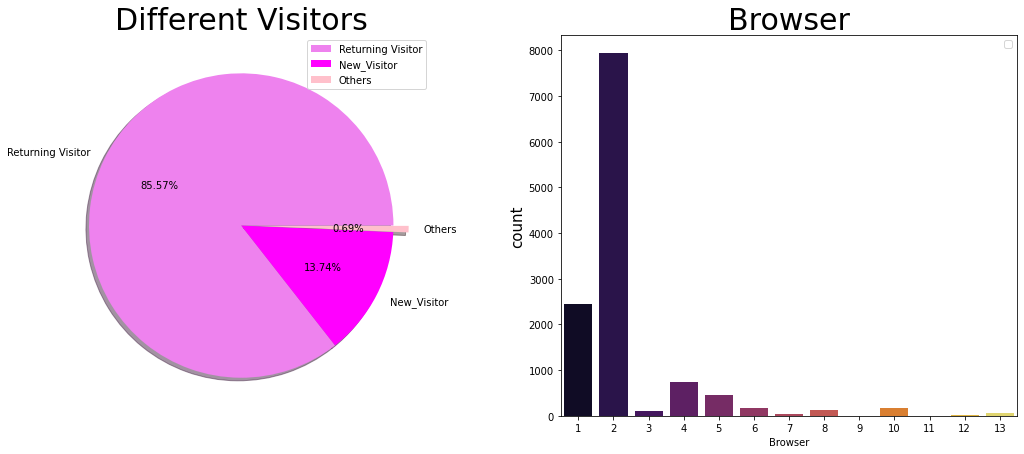

In [30]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
sns.countplot(data['Browser'], palette = 'inferno')
plt.title('Browser', fontsize = 30)
plt.ylabel('count', fontsize = 15)
plt.legend()
plt.show()

DARI HASIL GRAFIK PERTAMA DIATAS, DIDAPAT BAHWA PERSENTASE SHOPPER TERTINGGI YANG MENGUNJUNGI ONLINE SHOP ADALAH RETURNING VISITOR (PENGUNJUNG LAMA) DENGAN PERSENTASE SEBESAR 85.57%.

DAPAT KITA LIHAT BAHWA NEW VISITOR CUKUP SEDIKIT PERSENTASENYA, SEHINGGA DIPERLUKAN PROMOSI YANG AKTIF DI BERBAGAI SOSIAL MEDIA ATAU MEMBUAT CONTENT MARKETING YANG MENARIK SEHINGGA DAPAT MENARIK PENGUNJUNG BARU.

DARI HASIL GRAFIK KEDUA, DAPAT DILIHAT BAHWA PERAMBAN WEB YANG BANYAK DIGUNAKAN SHOPPER ADALAH PERAMBAN WEB JENIS KEDUA.

Text(0, 0.5, 'Product Related duration')

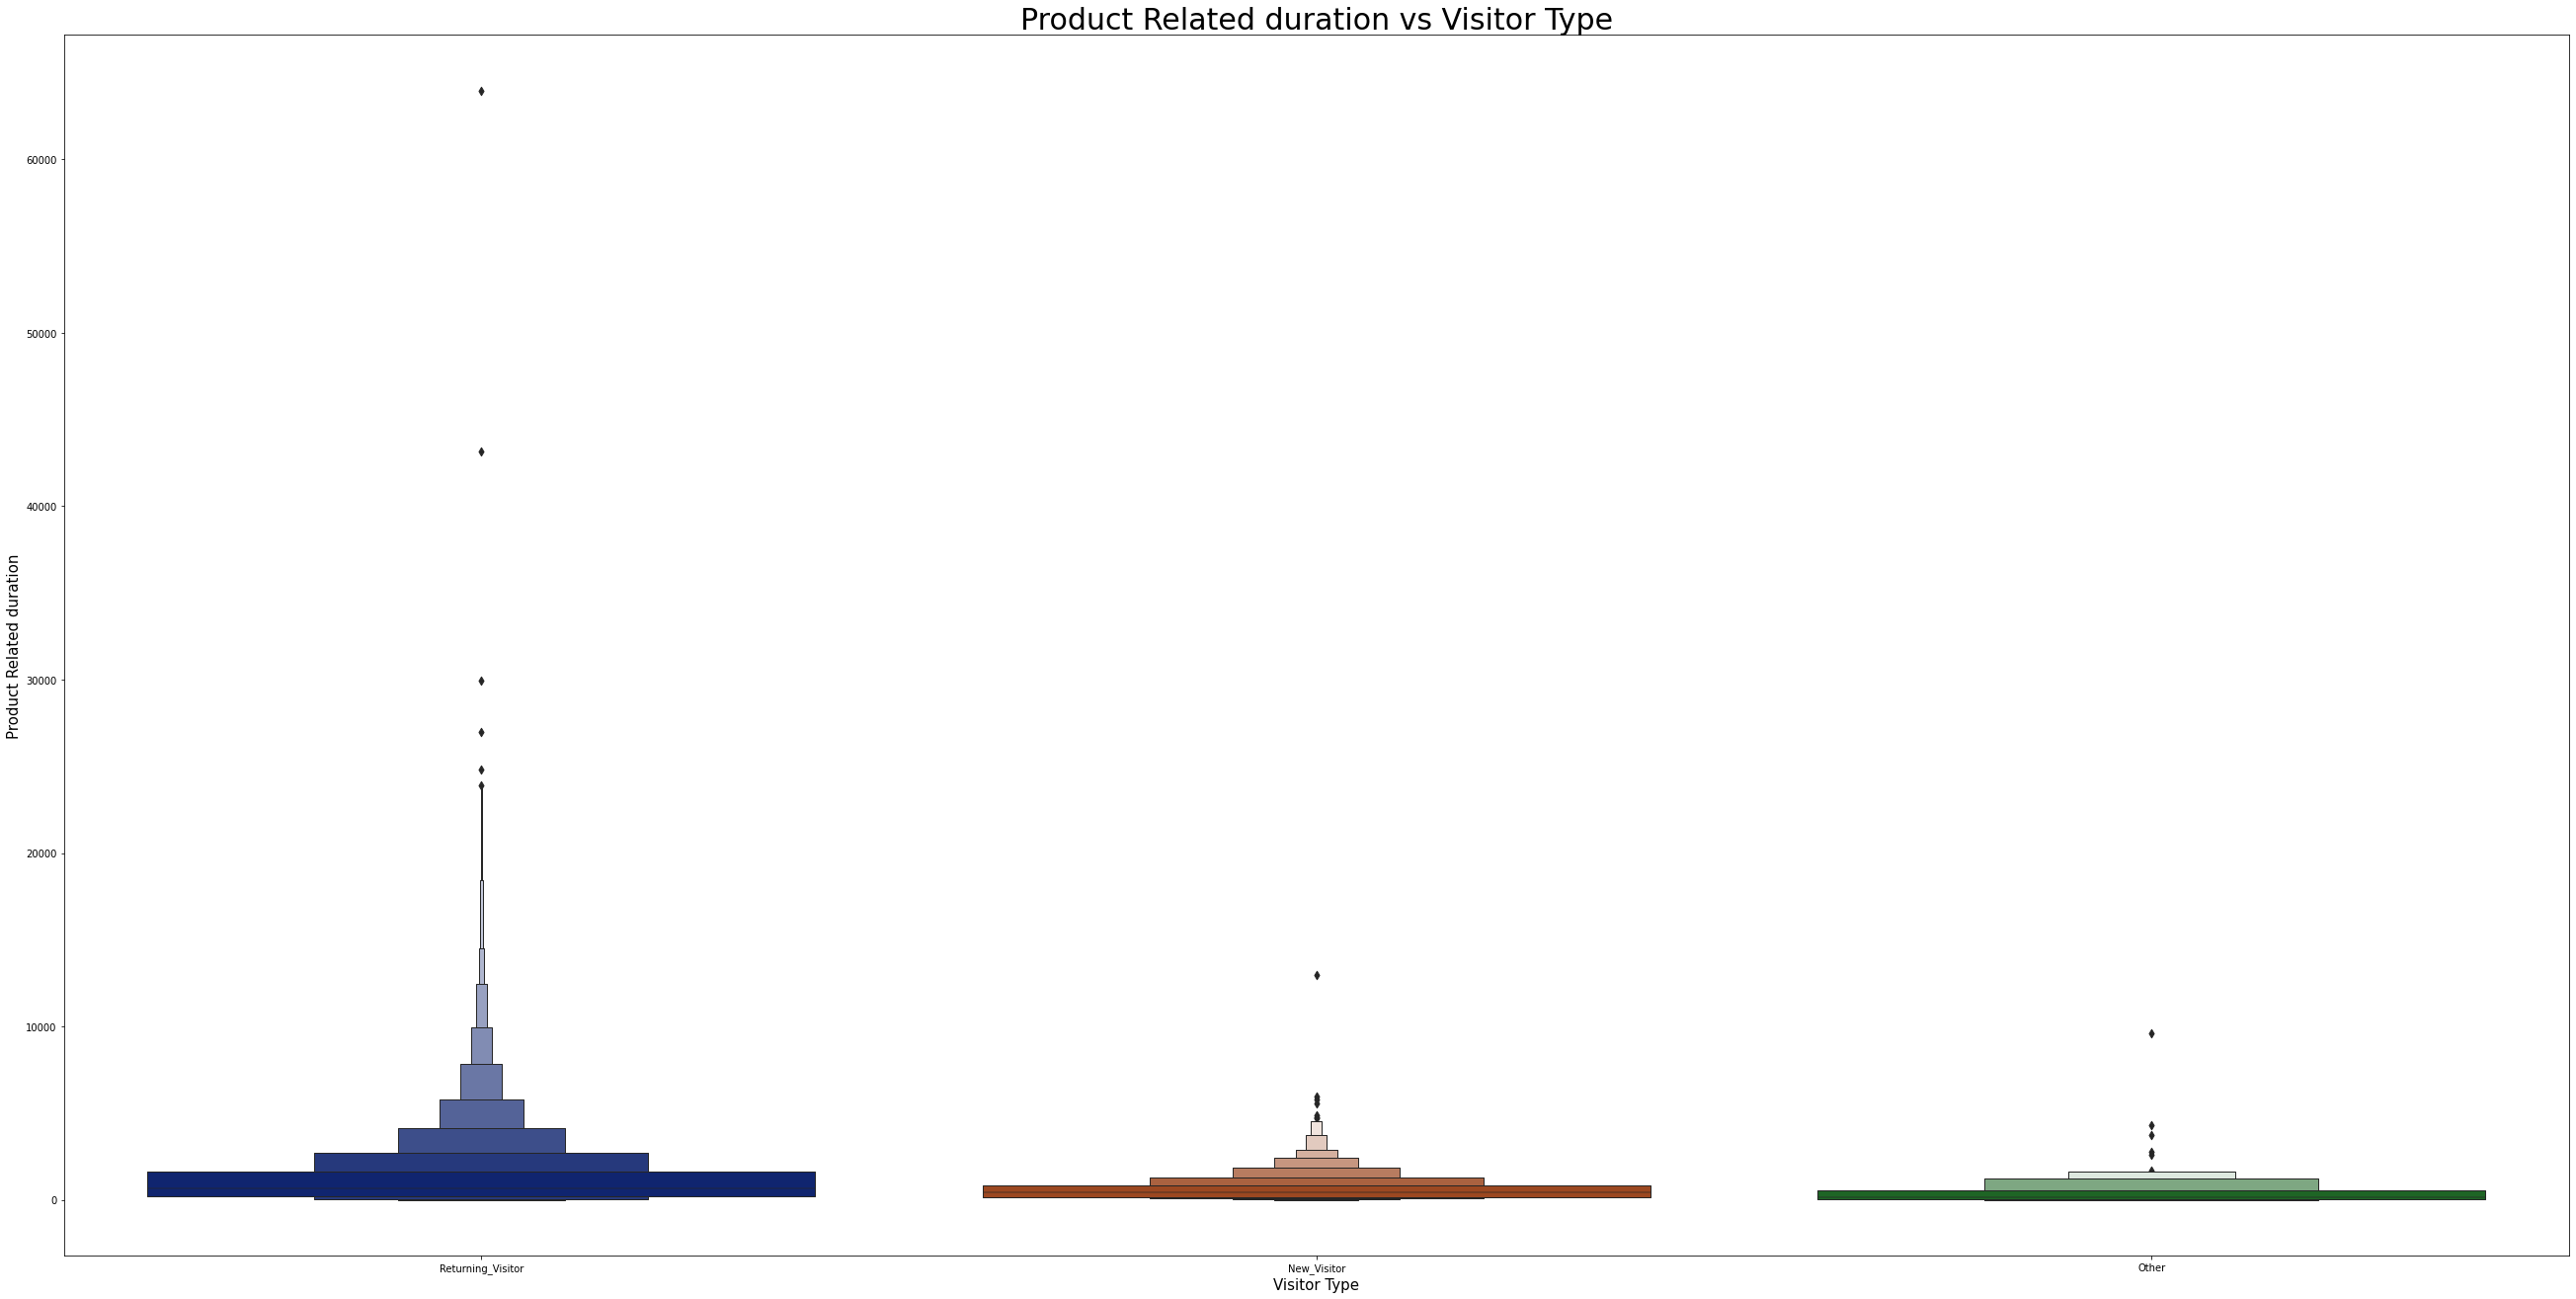

In [ ]:
# product related duration vs visitor type
plt.rcParams['figure.figsize'] = (100,50)
plt.subplot(2, 2, 3)
sns.boxenplot(data['VisitorType'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Visitor Type', fontsize = 30)
plt.xlabel('Visitor Type', fontsize = 15)
plt.ylabel('Product Related duration', fontsize = 15)

Text(0, 0.5, 'Exit Rates')

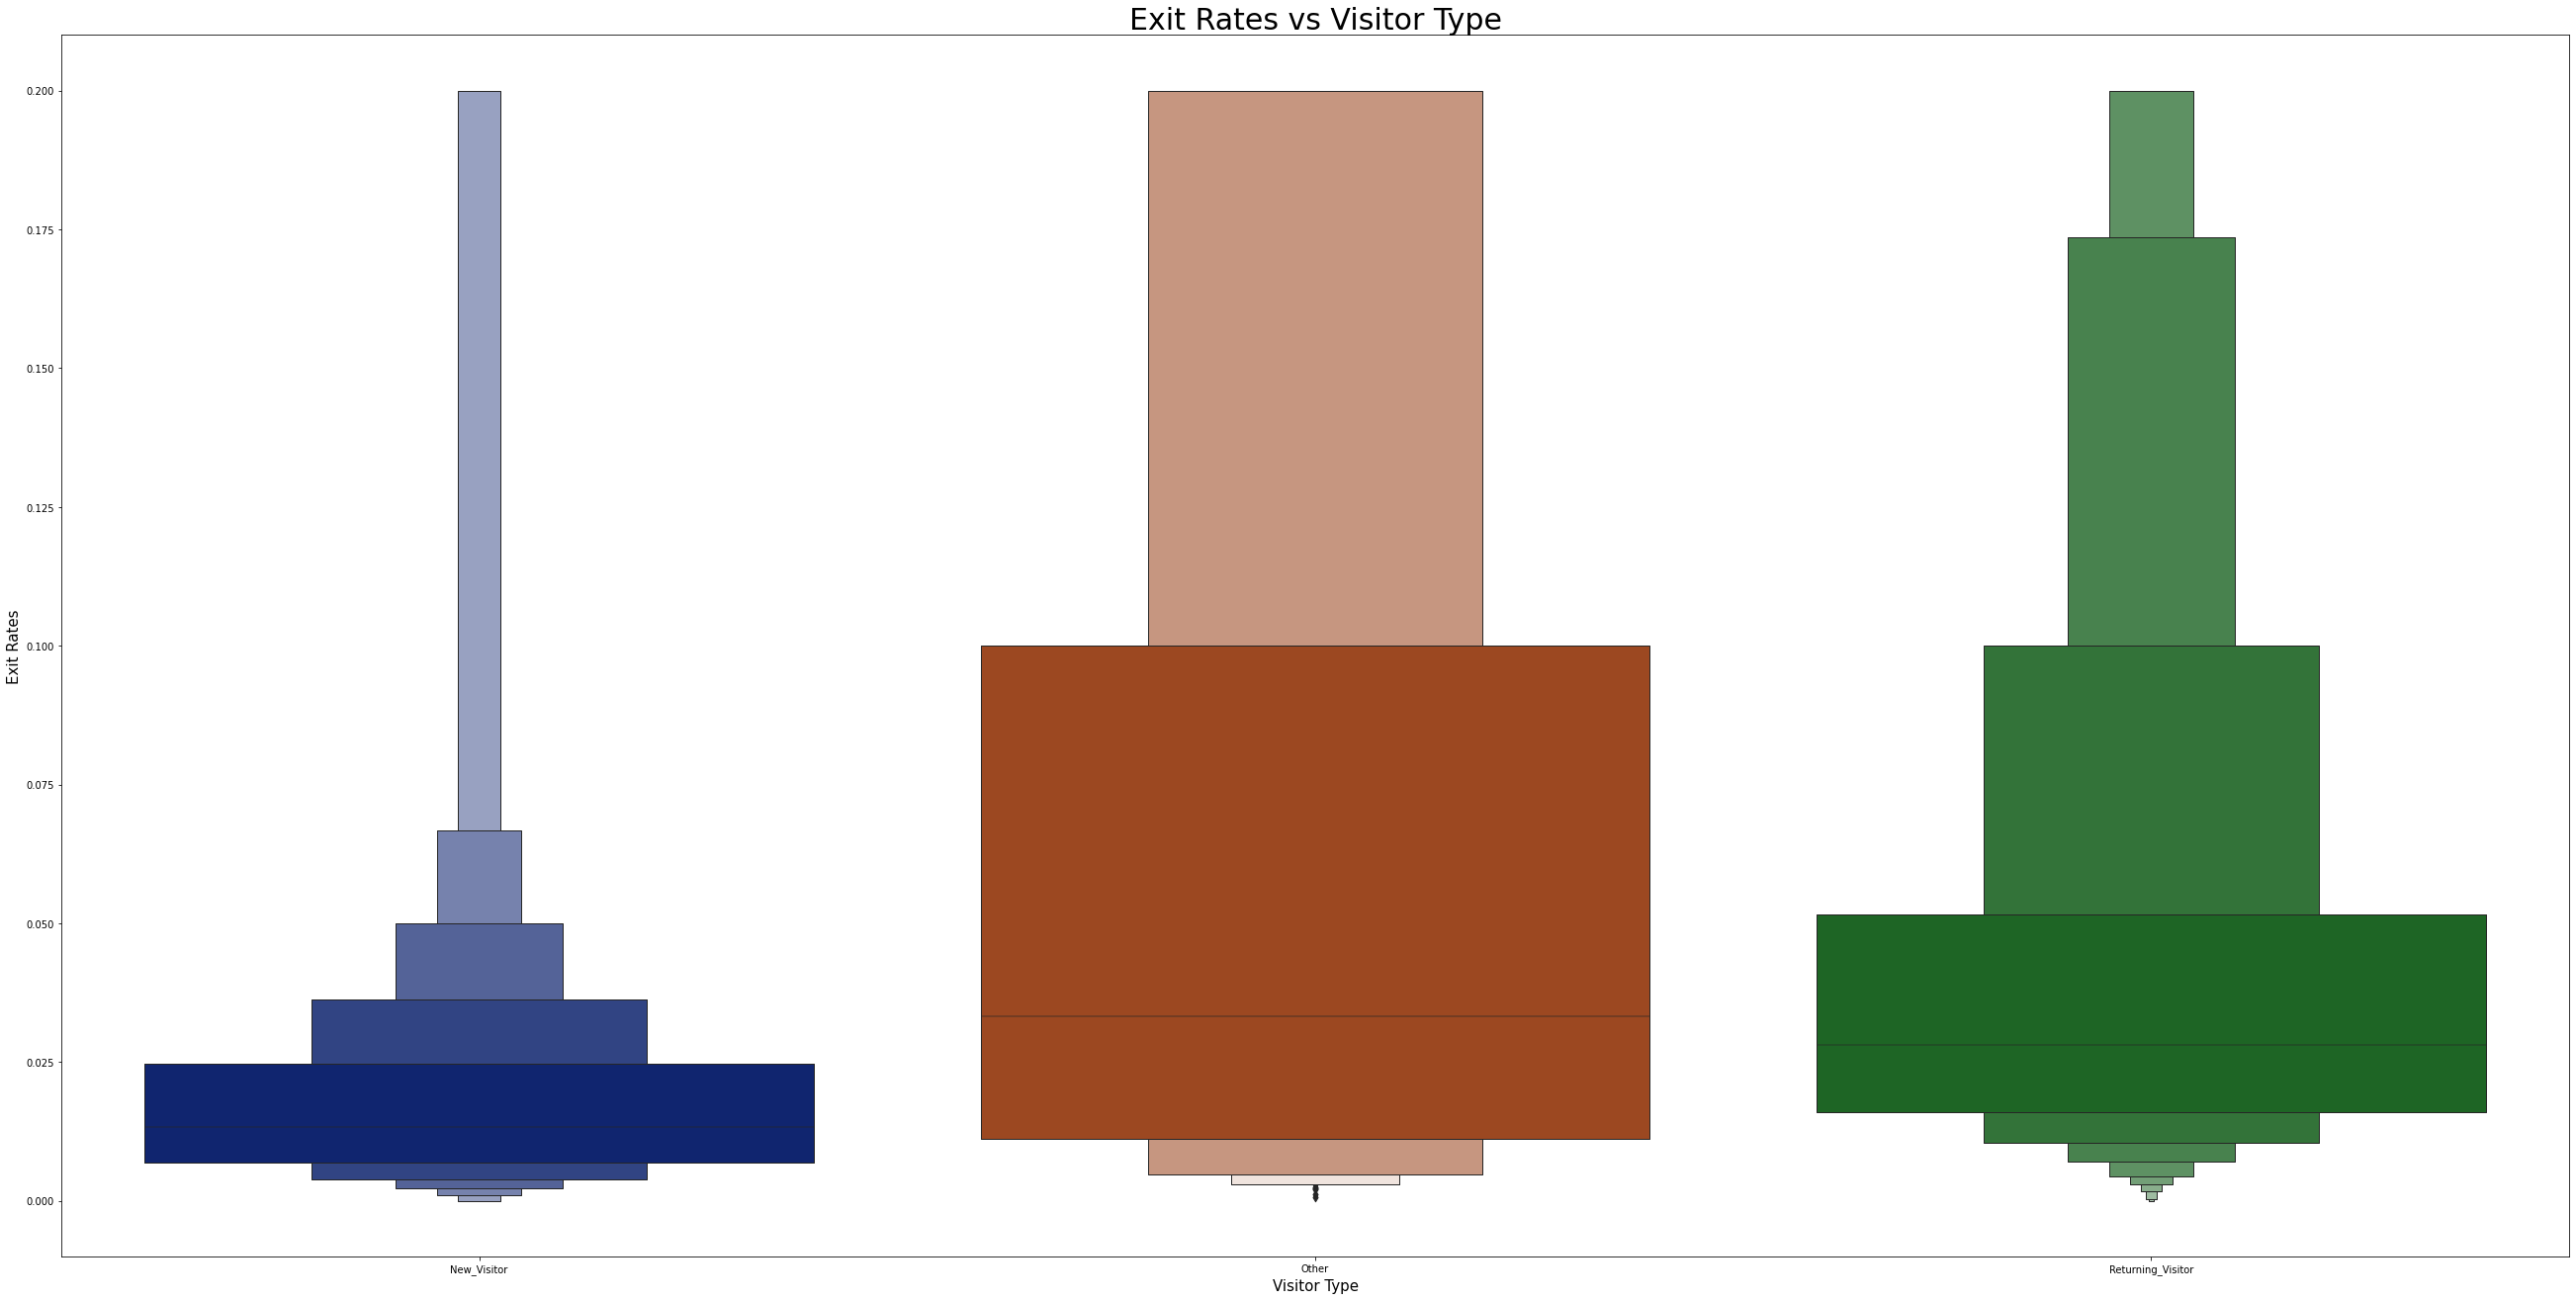

In [31]:
# exit rates vs visitor type
plt.rcParams['figure.figsize'] = (100,50)
plt.subplot(2, 2, 3)
sns.boxenplot(data['VisitorType'], data['ExitRates'], palette = 'dark')
plt.title('Exit Rates vs Visitor Type', fontsize = 30)
plt.xlabel('Visitor Type', fontsize = 15)
plt.ylabel('Exit Rates', fontsize = 15)

Text(0, 0.5, 'BounceRates')

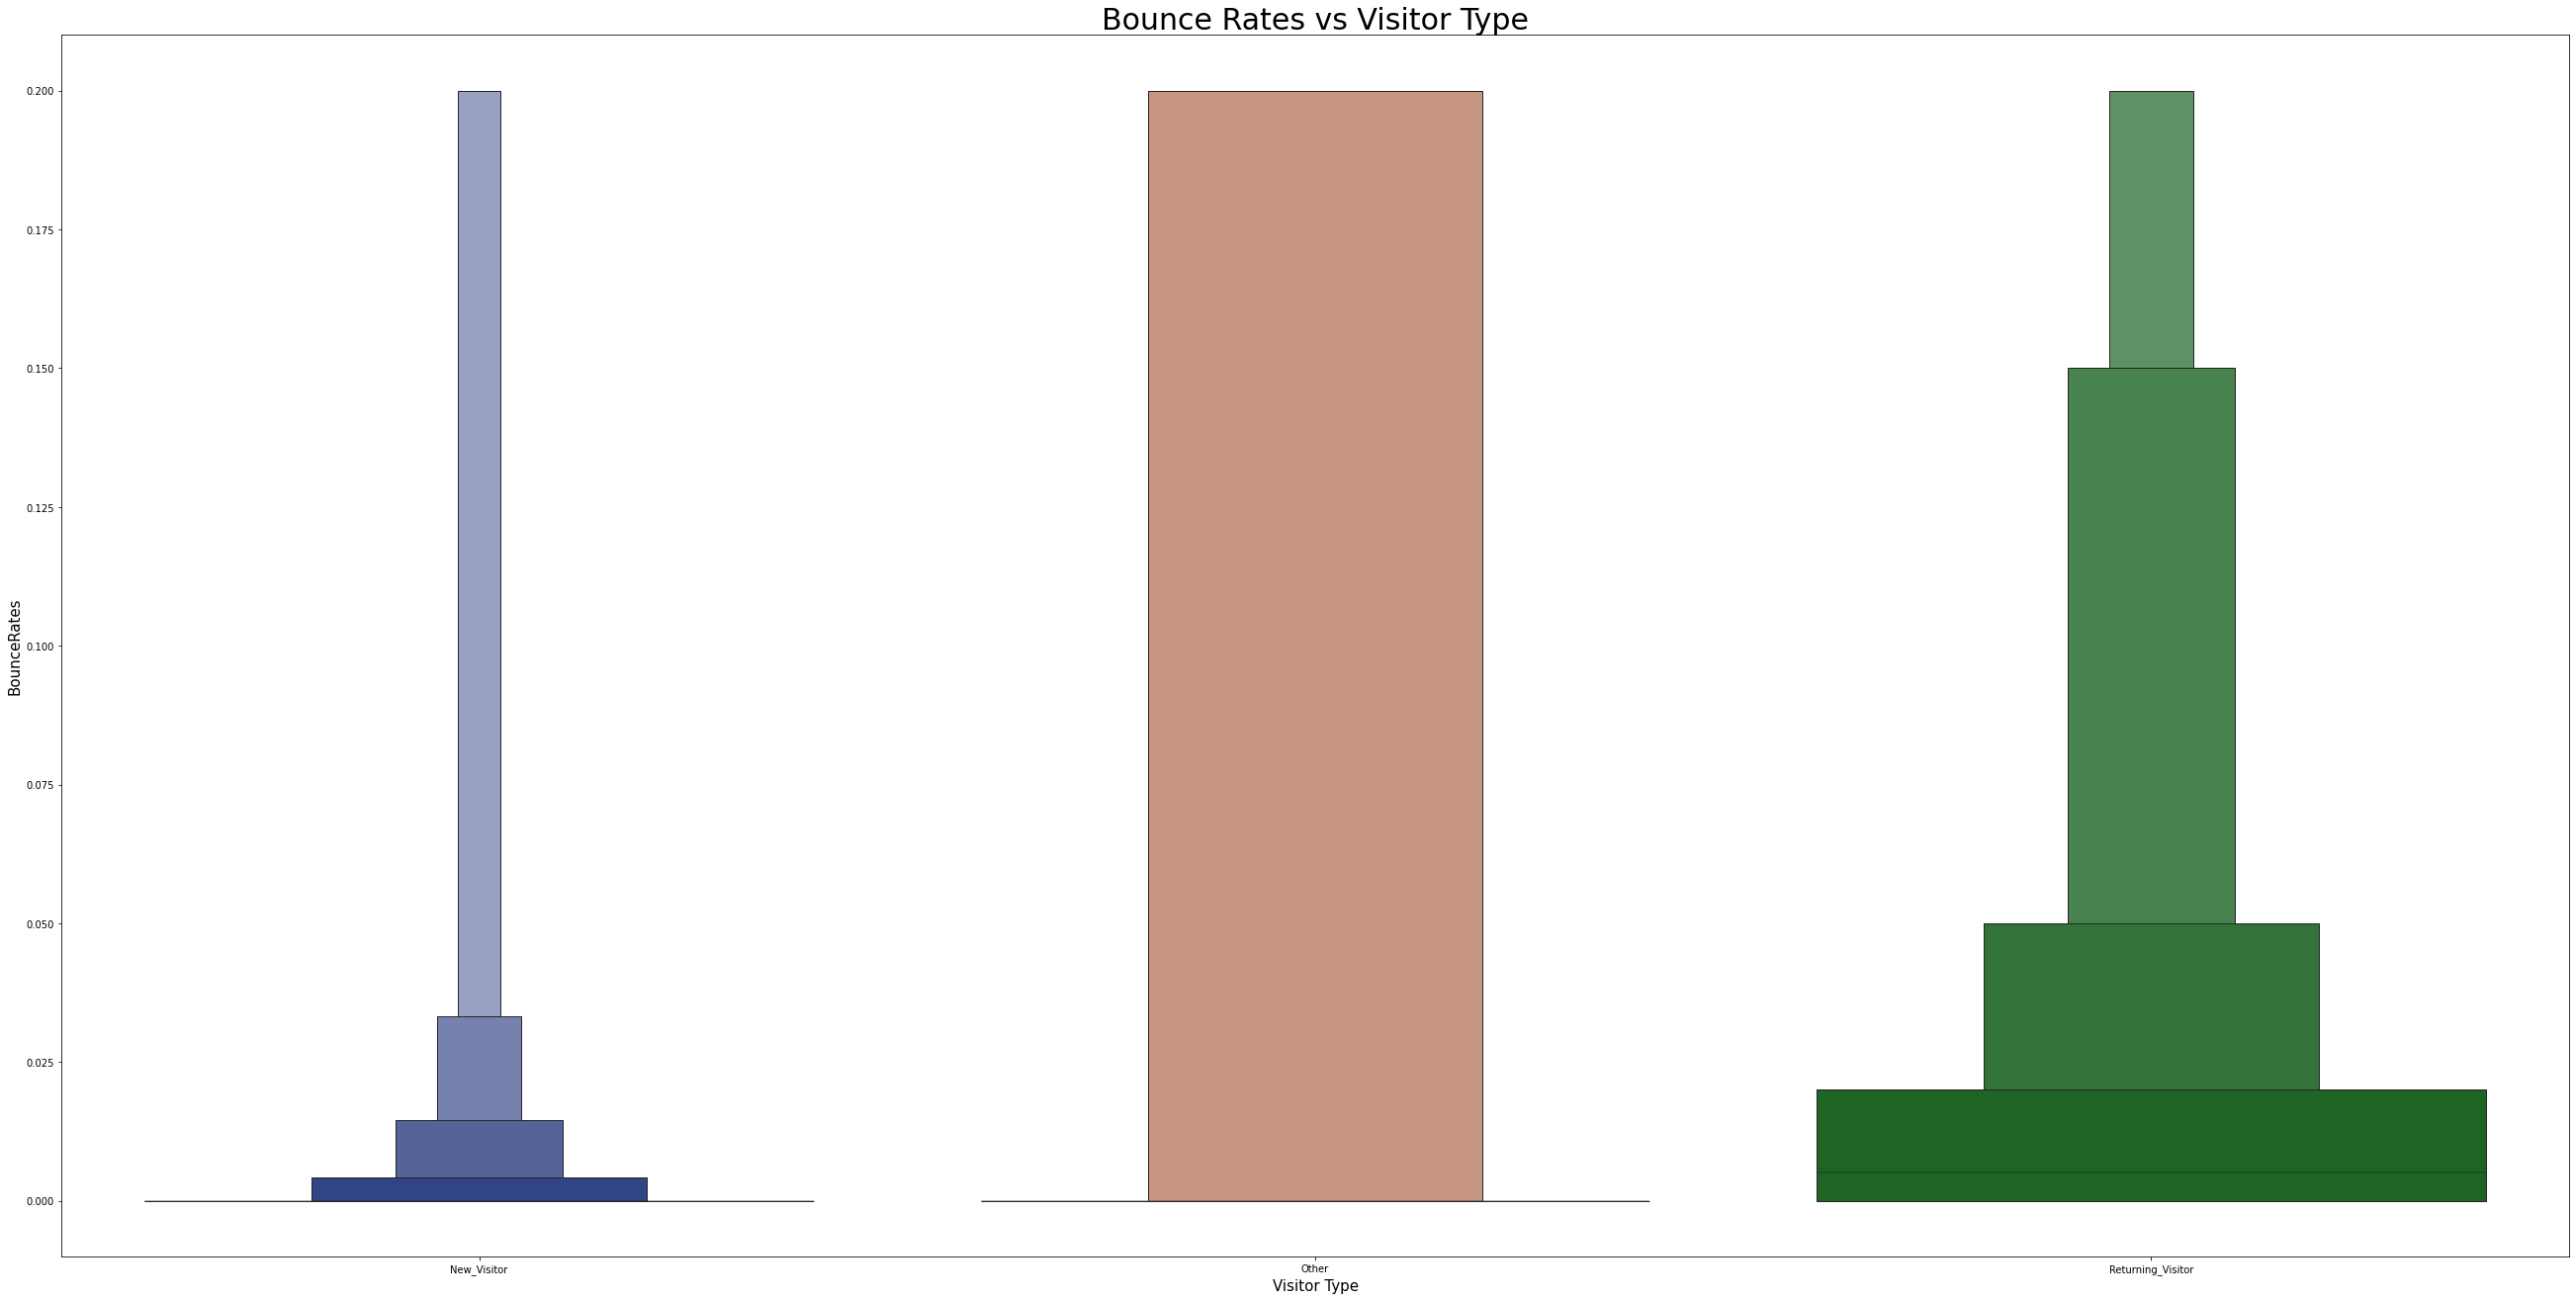

In [32]:
# bounce rates vs visitor type
plt.rcParams['figure.figsize'] = (100,50)
plt.subplot(2, 2, 3)
sns.boxenplot(data['VisitorType'], data['BounceRates'], palette = 'dark')
plt.title('Bounce Rates vs Visitor Type', fontsize = 30)
plt.xlabel('Visitor Type', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)

DARI HASIL GRAFIK PRODUCT RELATED DURATION, EXIT RATES, DAN BOUNCE RATES DIATAS, DAPAT DILIHAT BAHWA SHOPPER MEMILIKI KETERTARIKAN PADA ONLINE SHOP TERSEBUT. DIMANA KEBANYAKAN PENGUNJUNG TIDAK LANGSUNG MENINGGALKAN HALAMAN WEB, DAN MEMILIKI DURASI YANG LAMA DALAM MENGUNJUNGI ONLINE SHOP TERSEBUT.

DARI HASIL GRAFIK DIATAS, DAPAT DILIHAT BAHWA KETIGA VISITOR KEBANYAKAN TIDAK LANGSUNG MENINGGALKAN HALAMAN WEB PERTAMA (BOUNCE RATENYA RENDAH). NAMUN, PADA AKHIRNYA MEREKA TIDAK MELAKUKAN TRANSAKSI

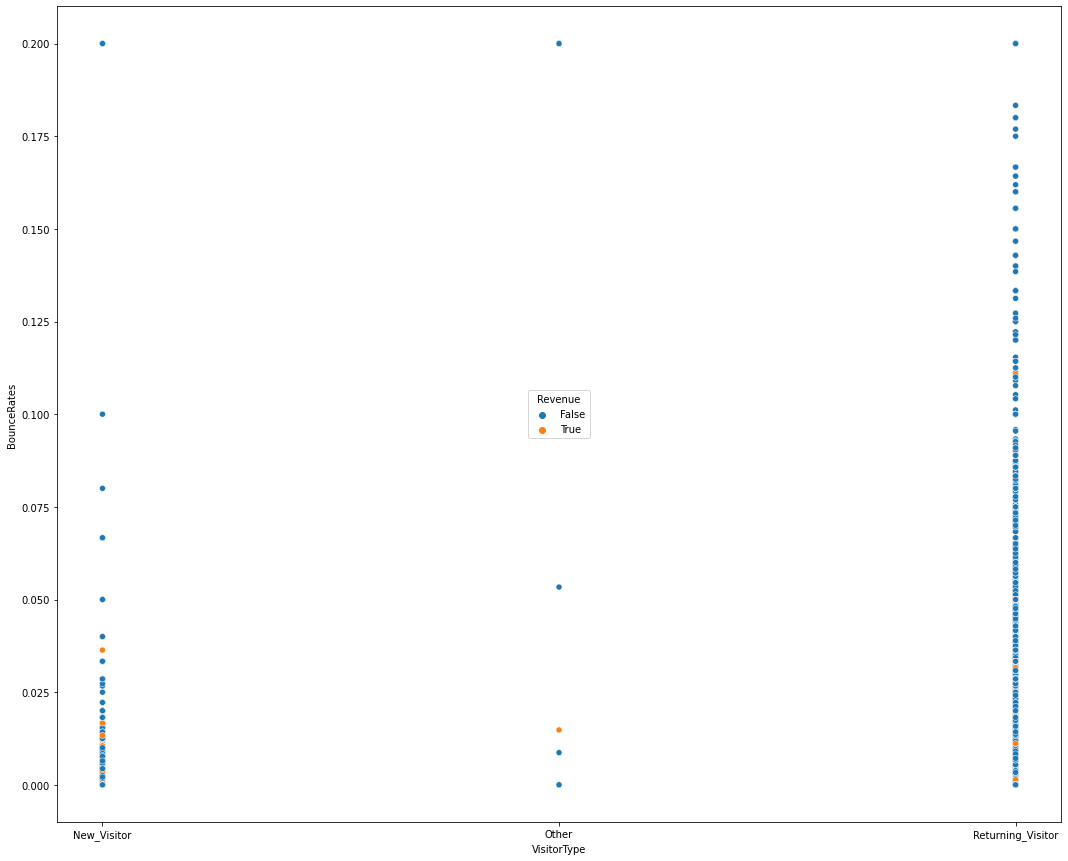

In [33]:
plt.rcParams['figure.figsize'] = (18, 15)
sns.scatterplot(data['VisitorType'],data['BounceRates'],hue=data['Revenue'])

DARI HASIL GRAFIK DIATAS, DAPAT DILIHAT BAHWA KETIGA VISITOR KEBANYAKAN TIDAK LANGSUNG MENINGGALKAN HALAMAN WEB PERTAMA (BOUNCE RATENYA RENDAH). NAMUN, PADA AKHIRNYA MEREKA TIDAK MELAKUKAN TRANSAKSI.

Text(6.799999999999997, 0.5, 'count')

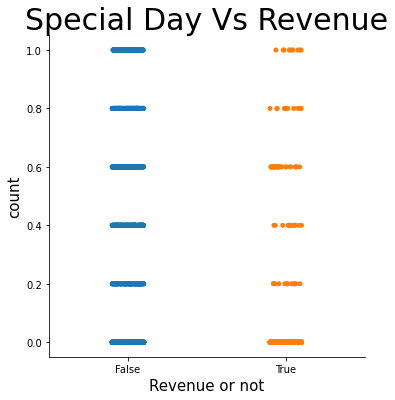

In [34]:
# checking the Distribution of customers on Revenue
# JANGAN LUPA DIBARENGI###############################
sns.catplot(x="Revenue", y="SpecialDay", data=data)
plt.title('Special Day Vs Revenue', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

Text(0, 0.5, 'count')

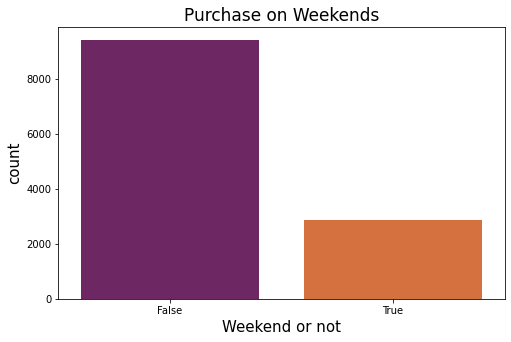

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 17)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

dari grafik di atsa dapat kita lihat bahwa pada special day berpotensi untuk meningkatkan para pengunjung dalam melakukan transaksi. Dan juga sebelumnya, kita tahu bahwa banyak pengunjung mengunjungi website pada weekdays, sehingga setiap special day yang jatuh pada weekdays, untuk lebih diberi promo, voucher discount, dan lain-lain.

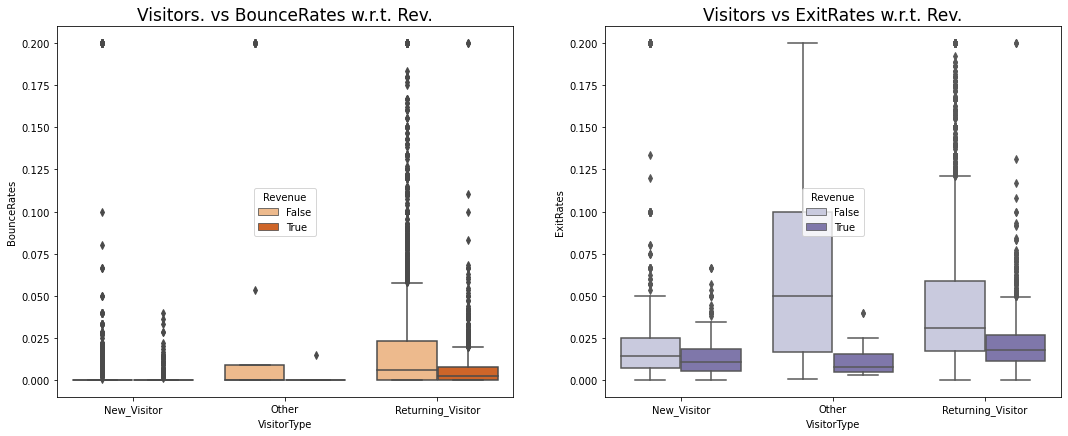

In [36]:
# visitor type vs bounce rates w.r.t revenue
plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Oranges')
plt.title('Visitors. vs BounceRates w.r.t. Rev.', fontsize = 17)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('Visitors vs ExitRates w.r.t. Rev.', fontsize = 17)

plt.show()

DARI PENJELASAN SEBELUMNYA DIDAPAT BAHWA, EXIT RATES, DAN BOUNCE RATES DIATAS, DAPAT DILIHAT BAHWA SHOPPER MEMILIKI KETERTARIKAN PADA ONLINE SHOP TERSEBUT. DIMANA KEBANYAKAN PENGUNJUNG TIDAK LANGSUNG MENINGGALKAN HALAMAN WEB. NAMUN KEBANYAKAN DARI MEREKA TIDAK MELAKUKAN TRANSAKSI.

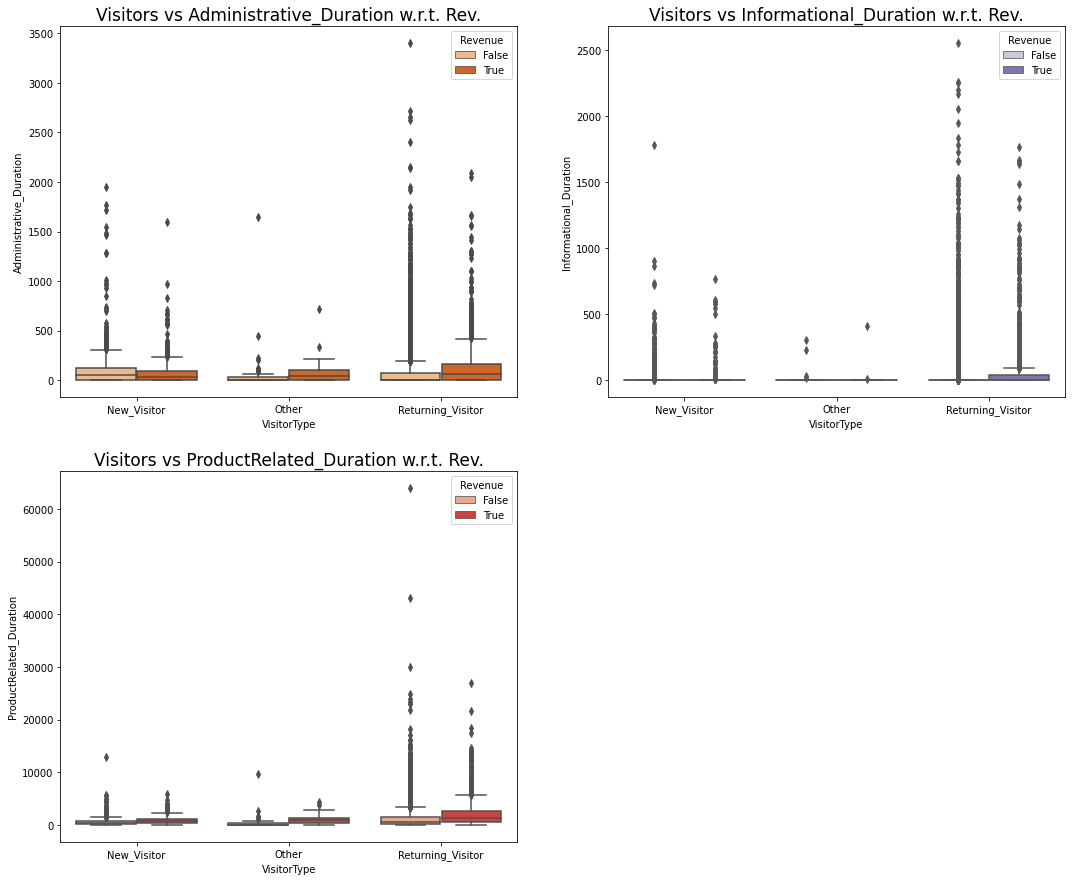

In [37]:
# visitor type vs Administrative_Duration w.r.t revenue
plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = data['VisitorType'], y = data['Administrative_Duration'], hue = data['Revenue'], palette = 'Oranges')
plt.title('Visitors vs Administrative_Duration w.r.t. Rev.', fontsize = 17)

# visitor type vs Informational_Duration w.r.t revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data['VisitorType'], y = data['Informational_Duration'], hue = data['Revenue'], palette = 'Purples')
plt.title('Visitors vs Informational_Duration w.r.t. Rev.', fontsize = 17)

# visitor type vs ProductRelated_Duration w.r.t revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data['VisitorType'], y = data['ProductRelated_Duration'], hue = data['Revenue'], palette = 'Reds')
plt.title('Visitors vs ProductRelated_Duration w.r.t. Rev.', fontsize = 17)

plt.show()

DARI HASIL GRAFIK DIATAS DIDAPAT BAHWA, VISITOR MELAKUKAN KUNJUNGAN YANG CUKUP LAMA. NAMUN KEBANYAKAN DARI MEREKA TIDAK MELAKUKAN TRANSAKSI.

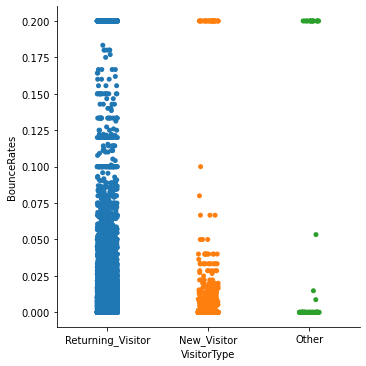

In [ ]:
sns.catplot(x='VisitorType',y='BounceRates',hue='Revenue',data=data)
#VERSI CATPLOT

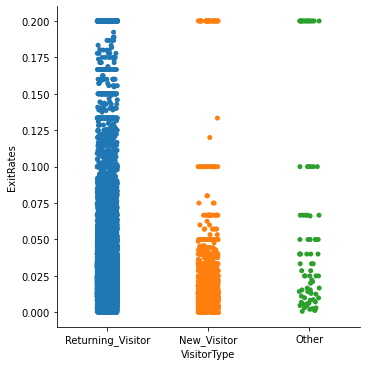

In [ ]:
sns.catplot(x='VisitorType',y='ExitRates',hue='Revenue',data=data)
#VERSI CATPLOT

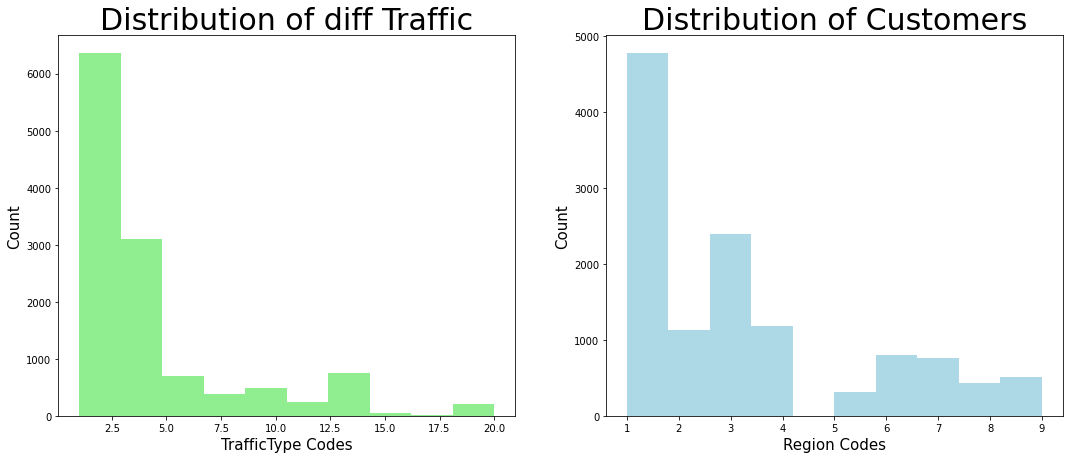

In [ ]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [ ]:
# checking the no. of OSes each user is having

data['OperatingSystems'].value_counts()

2    6586
1    2576
3    2548
4     476
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [ ]:
#checking the months with most no.of customers visiting the online shopping sites

data['Month'].value_counts()

May     3358
Nov     2995
Mar     1897
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      431
June     288
Feb      171
Name: Month, dtype: int64

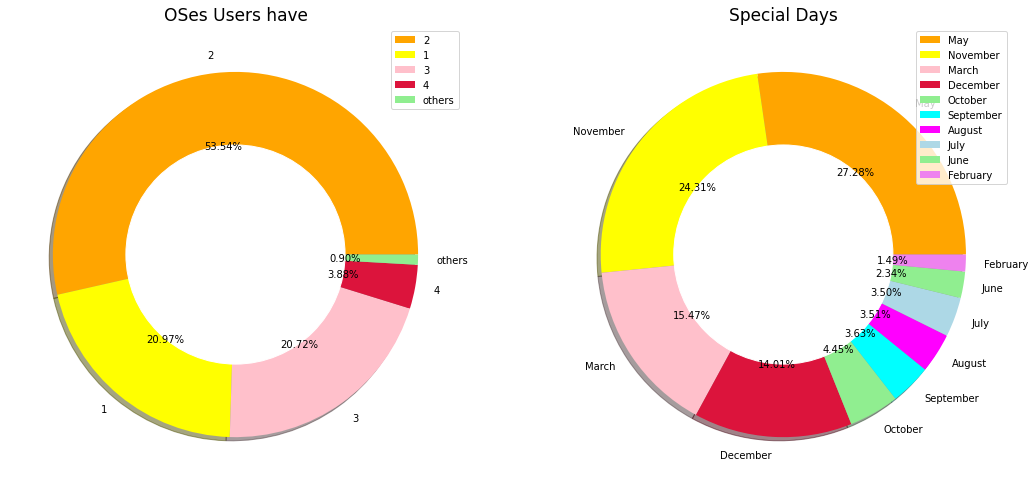

In [38]:
# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 17)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 17)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

DARI HASIL GRAFIK PERTAMA, DAPAT DILIHAT BAHWA SISTEM OPERASI YANG PALING BANYAK DIGUNAKAN SHOPPER ADALAH SISTEM OPERASI JENIS KEDUA.

DARI HASIL GRAFIK KEDUA, KARENA SPECIAL DAY ADALAH KORELASI KUNJUNGAN SHOPPER PADA SPECIAL DAY, SEHINGGA DAPAT DILIHAT BAHWA TERDAPAT BANYAK KUNJUNGAN SHOPPER PADA BULAN MEI,VOVEMBER,MARET DAN DESEMBER

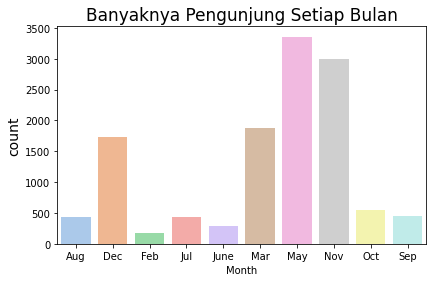

In [39]:
# checking the Distribution of customers on Region
plt.rcParams['figure.figsize'] = (70,4)
plt.subplot(1, 9, 1)
sns.countplot(data['Month'], palette = 'pastel')
plt.title('Banyaknya Pengunjung Setiap Bulan', fontsize = 17)
plt.ylabel('count', fontsize = 14)
plt.show()

DARI HASIL GRAFIK DIATAS, PENGUNJUNG TERBANYAK PADA BULAN MEI, NOVEMBER, MARET DAN DESEMBER (BERKAITAN DENGAN HASIL GRAFIK SPECIAL DAY DIATAS). KEMUDIAN UNTUK MENINGKATKAN PENGUNJUNG DI BULAN LAINNYA ADALAH DENGAN MENGADAKAN EVENT YANG MENARIK DI SETIAP BULANNYA.

In [40]:
def groupedbarplot(data, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(data.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(data.columns, pos):
        bars.append(ax.bar(np.arange(len(data))+x, data[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(data[col].values, np.arange(len(data))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(data)))
    ax.set_xticklabels(data.index)
    return bars

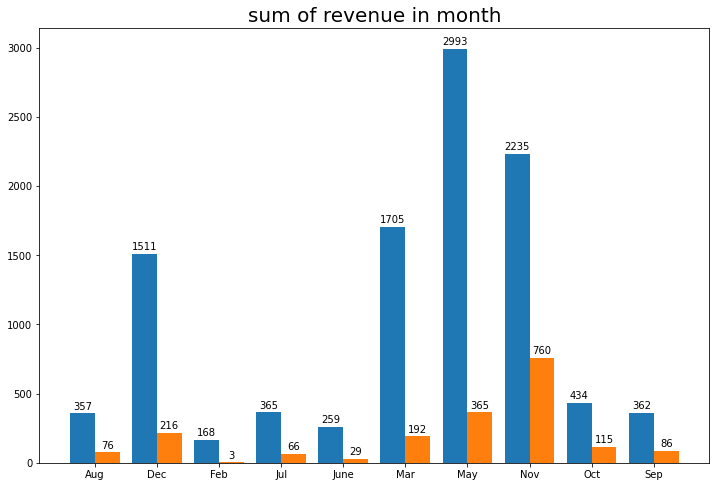

In [ ]:
#mau lihat customer di region mana yang melakukan pembelian terbanyak
counts = data.groupby(['Month', 'Revenue']).size().unstack()
plt.figure(figsize=(12,8))
plt.title('sum of revenue in month', fontsize = 20)
groupedbarplot(counts)
plt.show()

DARI HASIL GRAFIK DIATAS, DAPAT DILIHAT BAHWA DENGAN JUMLAH KUNJUNGAN YANG BANYAK MAKA AKAN DIDAPAT TRANSAKSI YANG CUKUP BANYAK JUGA. DENGAN DEMIKIAN, BANYAKNYA KUNJUNGAN KE WEBSITE BERPOTENSI UNTUK MENINGKATKAN JUMLAH TRANSAKSI.

Text(0.5, 1.0, 'Revenue in weekends')

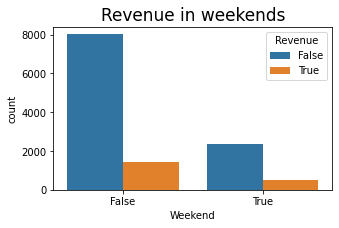

In [41]:
plt.figure(figsize=(5,3))
sns.countplot(data['Weekend'],hue=data['Revenue'])
plt.title('Revenue in weekends', size=17)

DARI HASIL GRAFIK DIATAS,WALAUPUN LEBIH BANYAK PENGUNJUNG DI WEEKDAYS, NAMUN BAIK WEEKDAYS MAUPUN WEEKEND SAMA-SAMA TIDAK MENGHASILKAN BANYAKNYA TRANSAKSI.

DARI HASIL DIATAS, BULAN NOVEMBER DAN MEI BANYAK WEEKEND, BULAN MEI LEBIH BANYAK WEEKDAYS

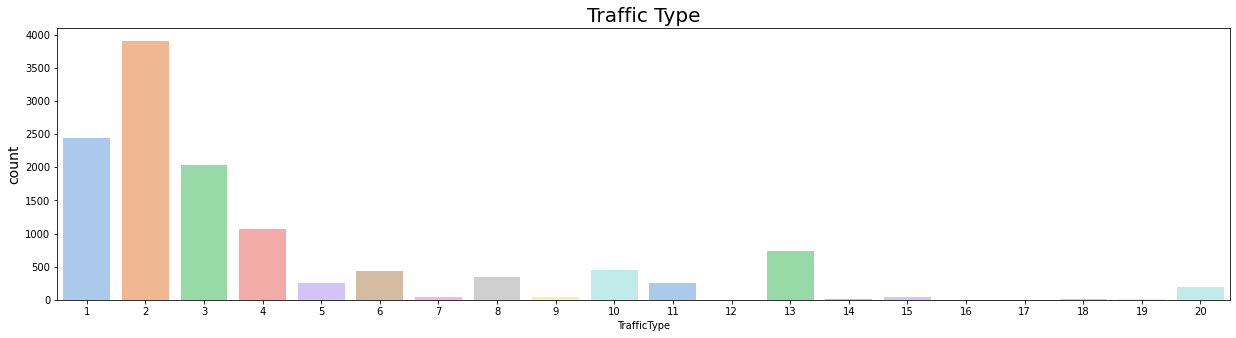

In [42]:
# checking the Distribution of customers on Region
plt.rcParams['figure.figsize'] = (500,5)
plt.subplot(1, 20, 1)
sns.countplot(data['TrafficType'], palette = 'pastel')
plt.title('Traffic Type', fontsize = 20)
plt.ylabel('count', fontsize = 14)
plt.show()

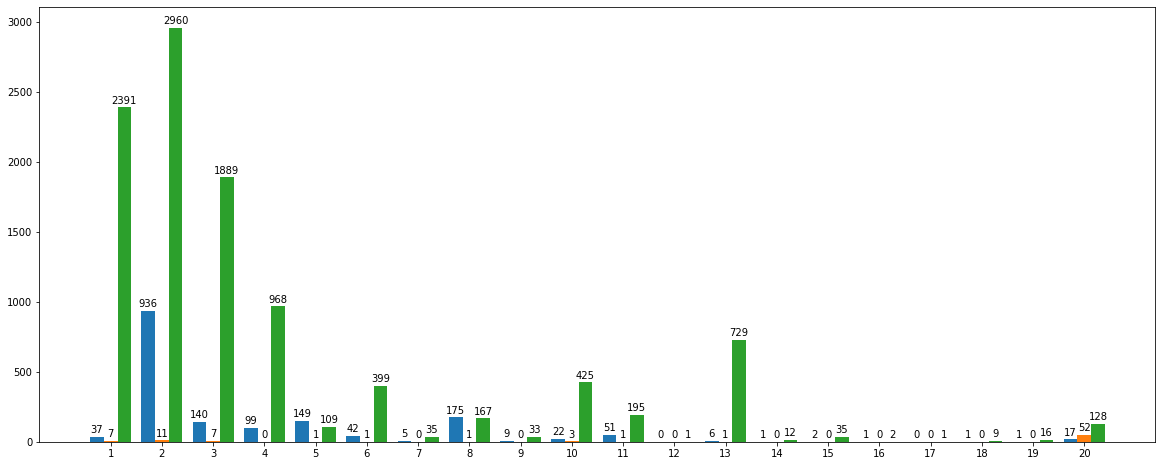

In [43]:
ce = data.groupby(['TrafficType', 'VisitorType']).size().unstack()
plt.figure(figsize=(20,8))
groupedbarplot(ce)
plt.show()

dari grafik pertama diatas, dapat kita lihat bahwa kunjungan web page melalui traffic type yang tinggi ada pada type 2, 1, 3, dan 4. Sedangkan type 12, 14, 16 , 17, 18, dan 19 memilki frekuensi kunjungan yang sangat kecil. Dengan demikian, agar online shop memiliki pengeluaran yang lebih efisien maka lebih baik fokus terhadap type yang tinggi dan type yang rendah lebih baik tidak dilanjutkan.

dan pada grafik kedua, para new visitor yang berkunjung ke halaman web page online shope melalui traffic type yang kedua signifikan lebih tinggi dibandingkan yang lain, untuk itu pada traffic type kedua dalam mempromosikan online shop,lebih dibuat iklan sebnayak mungkin dibandingkan jenis traffic type yang lain.

In [44]:
def groupedbarplot(data, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(data.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(data.columns, pos):
        bars.append(ax.bar(np.arange(len(data))+x, data[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(data[col].values, np.arange(len(data))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(data)))
    ax.set_xticklabels(data.index)
    return bars

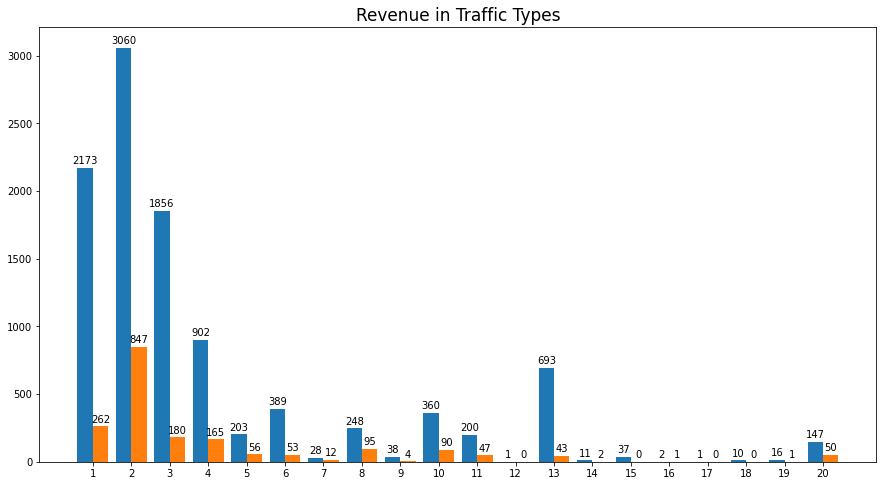

In [45]:
cs = data.groupby(['TrafficType', 'Revenue']).size().unstack()
plt.figure(figsize=(15,8))
plt.title('Revenue in Traffic Types', size = 17)
groupedbarplot(cs)
plt.show()

Berhubungan dengan grafik di atas, dengan jumlah traffictype yang tinggi memliki revenue yang cukup tinggi juga. sehingga solusi kita meningkatlan traffic type yang tinggi adalah solusi yang tepat. NAmun perlu diadakan evalusi dari segi variabel lain untuk meningkatkan transaksi.

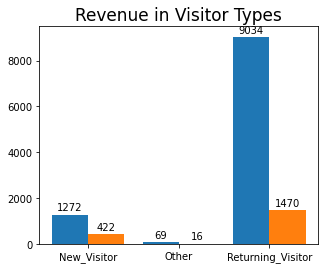

In [46]:
counts = data.groupby(['VisitorType', 'Revenue']).size().unstack()
plt.figure(figsize=(5,4))
plt.title('Revenue in Visitor Types', size=17)
groupedbarplot(counts)
plt.show()

Dari hasil grafik di atas, kita dapat lihat bahwa pengunjung lama merupakan pengunjung terbanyak pada online shop. untuk membuat pengunjung lama kembali ke page websitenya maka akan diberikan penawaran special (ex ongkir gratis atau diskon) yang berbeda dibandingkan yang lain. Kemudian pengguna baru juga diberikan penawaran special yang berbeda dari returning visitor (mis diskon, voucher).

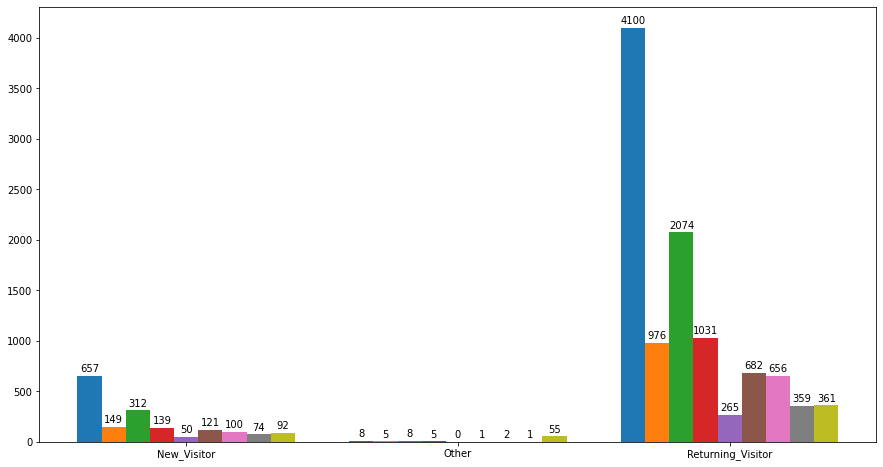

In [47]:
counts = data.groupby(['VisitorType', 'Region']).size().unstack()
plt.figure(figsize=(15,8))
groupedbarplot(counts)
plt.show()

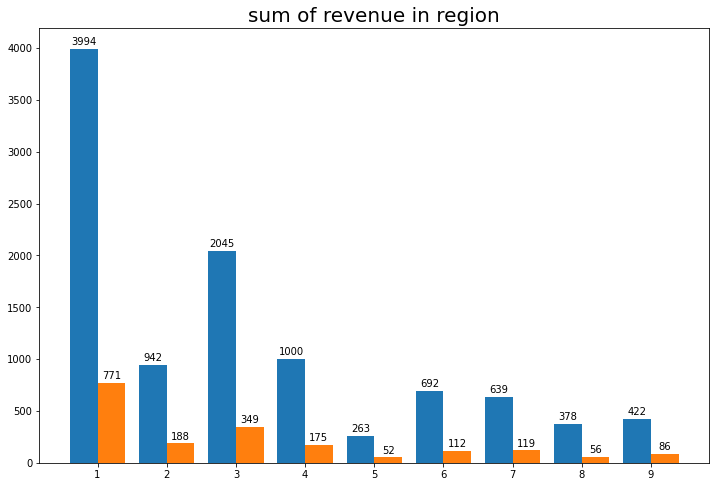

In [48]:
#mau lihat customer di region mana yang melakukan pembelian terbanyak
counts = data.groupby(['Region', 'Revenue']).size().unstack()
plt.figure(figsize=(12,8))
plt.title('sum of revenue in region', fontsize = 20)
groupedbarplot(counts)
plt.show()

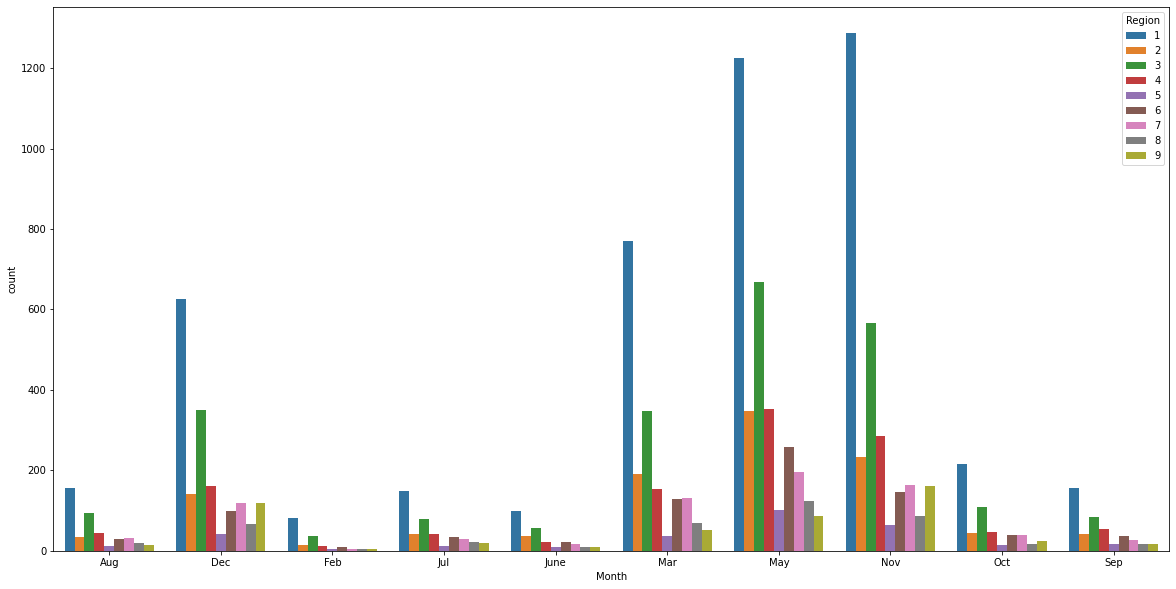

In [49]:
plt.figure(figsize=(20,10))
sns.countplot(data['Month'],hue=data['Region'])

In [50]:
weekend_data=pd.DataFrame()
weekend_data['Weekend']=[True,False]
weekend_data['Revenue User']=[data[(data['Weekend']==True) & (data['Revenue']==True)].shape[0]/data[(data['Weekend']==True)].shape[0],data[(data['Weekend']==False) & (data['Revenue']==True)].shape[0]/data[(data['Weekend']==False)].shape[0]]
weekend_data['Non Revenue User']=[data[(data['Weekend']==True) & (data['Revenue']==False)].shape[0]/data[(data['Weekend']==True)].shape[0],data[(data['Weekend']==False) & (data['Revenue']==False)].shape[0]/data[(data['Weekend']==False)].shape[0]]

weekend_data.set_index('Weekend',inplace=True,drop=True)
weekend_data=weekend_data.sort_values(by='Revenue User')
weekend_data

,Revenue User,Non Revenue User
Weekend,,
False,0.149559,0.850441
True,0.174354,0.825646


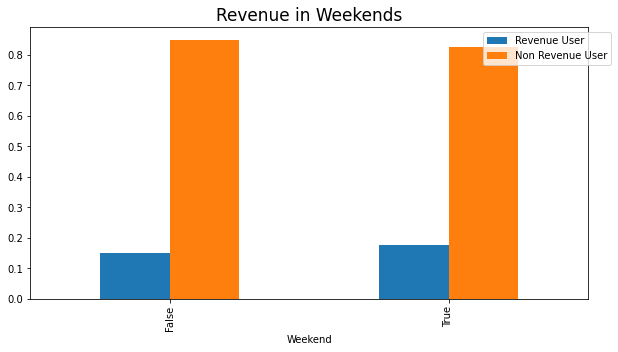

In [52]:
weekend_data.plot(kind='bar',figsize=(10,5))
plt.title('Revenue in Weekends', size = 17)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')

DARI HASIL DIATAS, PERSENTASE DARI REVENUE USER LEBIH BANYAK DI WEEKEND, TAPI USER TERBANYAK MENGUNJUNGI WEBSITE PADA WEEKDAYS

In [53]:
weekend_month=pd.crosstab(data['Month'],data['Weekend'])
weekend_month=weekend_month.sort_values(by=True,ascending=False)
weekend_month

Weekend,False,True
Month,,
Nov,2204,791
May,2642,715
Mar,1406,478
Dec,1361,366
Oct,405,144
Jul,327,104
Aug,337,96
Sep,352,96
June,241,47


DARI HASIL DIATAS, BULAN NOVEMBER DAN MEI BANYAK WEEKEND, BULAN MEI LEBIH BANYAK WEEKDAYS

**CLUSTERING**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative_Duration  12283 non-null  float64 
 1   Informational_Duration   12283 non-null  float64 
 2   ProductRelated_Duration  12283 non-null  float64 
 3   BounceRates              12283 non-null  float64 
 4   ExitRates                12283 non-null  float64 
 5   PageValues               12283 non-null  float64 
 6   SpecialDay               12283 non-null  float64 
 7   Month                    12283 non-null  category
 8   OperatingSystems         12283 non-null  category
 9   Browser                  12283 non-null  category
 10  Region                   12283 non-null  category
 11  TrafficType              12283 non-null  category
 12  VisitorType              12283 non-null  category
 13  Weekend                  12283 non-null  bool    
 14  Revenu

akan digunakan data yang sudah di standarisasi untuk melakukan clustering.

In [56]:
df2 = pd.concat([rescaleData, data_cat], axis = 1)
df2.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.002411,0.078947,0.122807,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [57]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

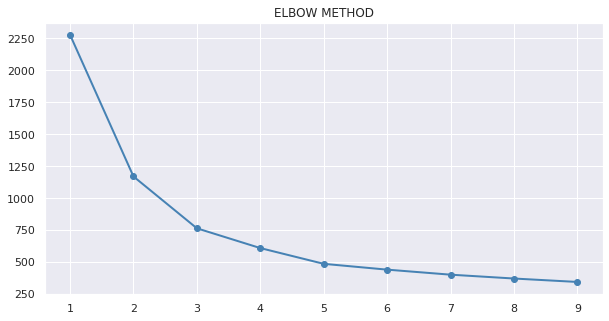

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(rescaleData)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(1,10),inertias, marker='o', lw=2, color='steelblue');

untuk melihat lagi berapa pembentukan cluster yang optimal, maka akan digunakan silhoutte method.

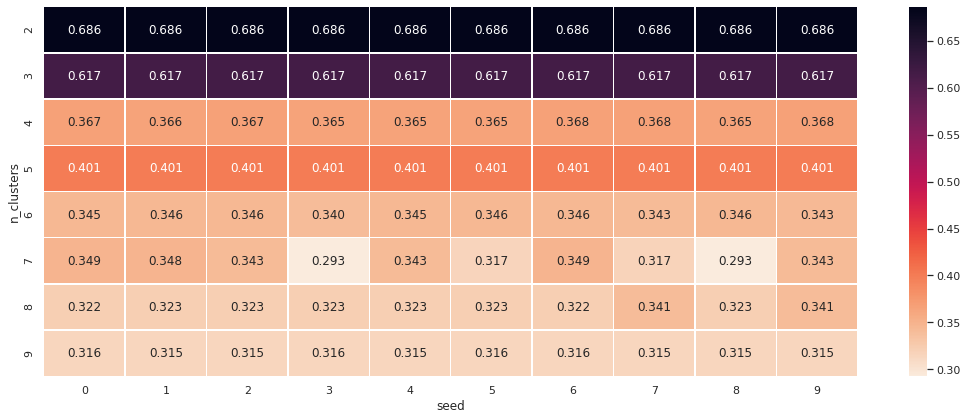

In [ ]:
#Silhoutte Method
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,10)
random_range = range(0,10)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(rescaleData)
        silhouette_avg = silhouette_score(rescaleData, cluster_labels)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

berdasarkan silhoutte method, n = 2 adalah yang terbaik, maka akan digunakan k = 2.

In [ ]:
#k=2
km = KMeans(n_clusters=2, max_iter=1000, random_state=1).fit(rescaleData)
labels = pd.DataFrame(km.labels_)
clustered_data = rescaleData.assign(Cluster=labels)

akan digunakan silhoutte plot untuk melihat gambaran proporsi dari cluster 1 dan 2.

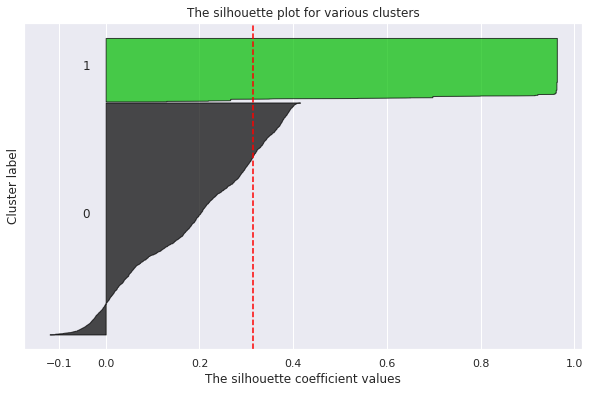

In [ ]:
#silhoutte plot
import matplotlib.cm as cm

sample_silhouette_values = silhouette_samples(rescaleData, cluster_labels)
fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(2):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10


ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

akan dibentuk 3d plot berdasarkan variabel bounce rates, exit rates, dan informational duration; bounce rates, exit rates, dan administrative duration; bounce rates, exit rates, dan product related duration.

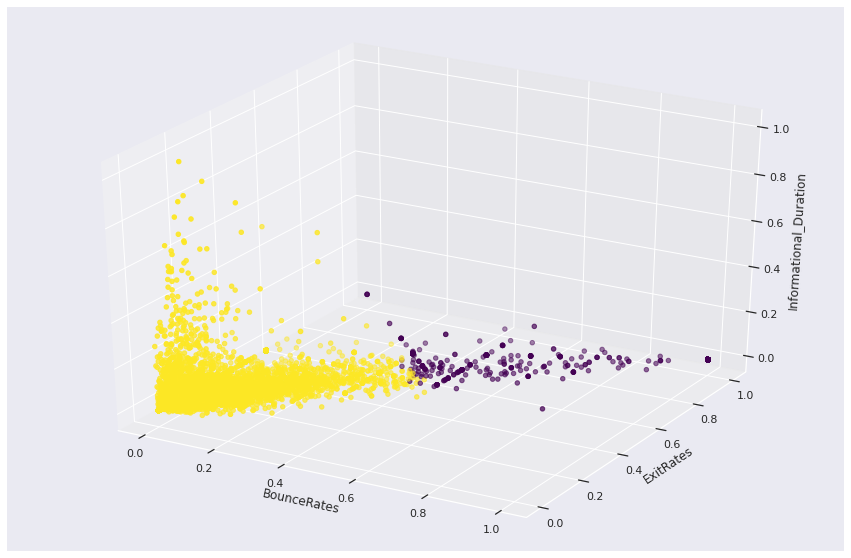

In [ ]:
#cluster 3d plot
import seaborn as sns; sns.set()

plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

xdata = df2['BounceRates']
ydata = df2['ExitRates']
zdata = df2['Informational_Duration']

ax.set_xlabel('BounceRates')
ax.set_ylabel('ExitRates')
ax.set_zlabel('Informational_Duration')

ax.scatter3D(xdata, ydata, zdata, c=km.labels_, cmap='viridis');

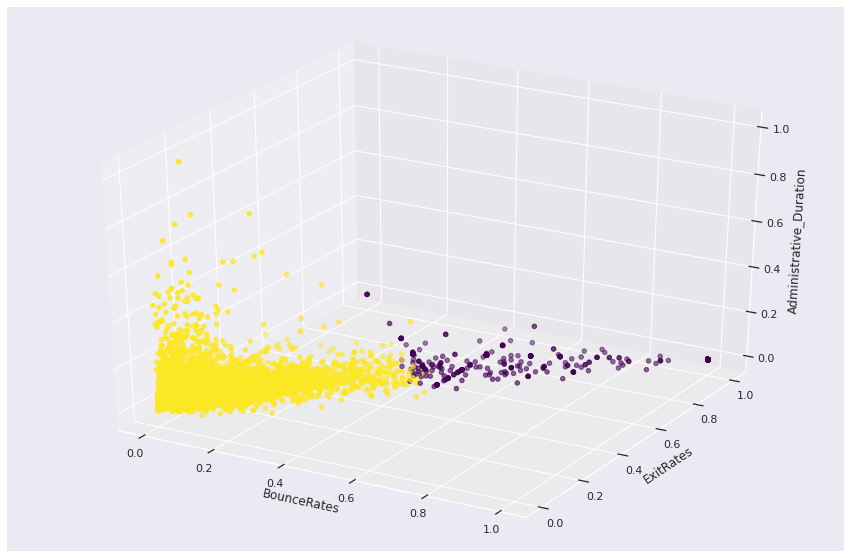

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

xdata = df2['BounceRates']
ydata = df2['ExitRates']
zdata = df2['Administrative_Duration']

ax.set_xlabel('BounceRates')
ax.set_ylabel('ExitRates')
ax.set_zlabel('Administrative_Duration')

ax.scatter3D(xdata, ydata, zdata, c=km.labels_, cmap='viridis');

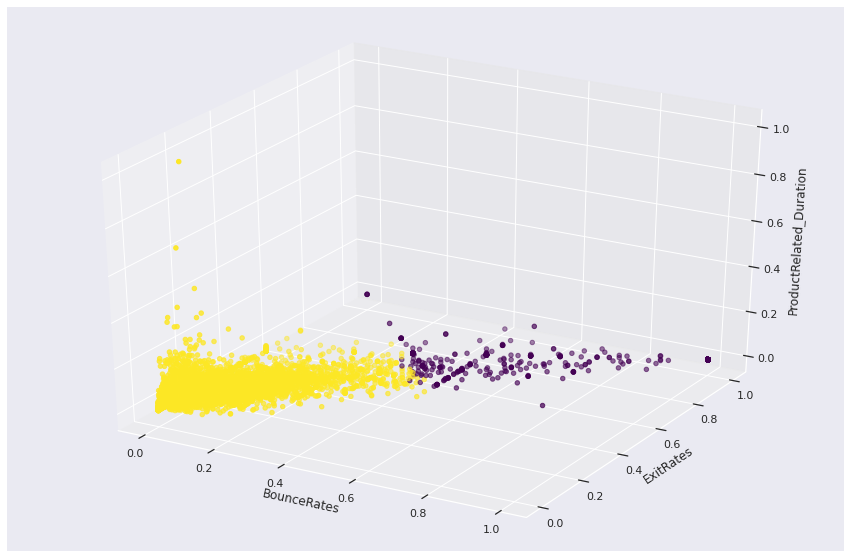

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

xdata = df2['BounceRates']
ydata = df2['ExitRates']
zdata = df2['ProductRelated_Duration']

ax.set_xlabel('BounceRates')
ax.set_ylabel('ExitRates')
ax.set_zlabel('ProductRelated_Duration')

ax.scatter3D(xdata, ydata, zdata, c=km.labels_, cmap='viridis');

akan didefinisikan df_new, yaitu gabungan dari data asli setelah dinormalisasi dengan variabel Cluster yang baru terbentuk.

In [ ]:
df_new=df2.copy()
df_new['Cluster'] = km.labels_
df_new['Cluster'] = df_new['Cluster'].astype(str)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12283 non-null  float64 
 1   Administrative_Duration  12283 non-null  float64 
 2   Informational            12283 non-null  float64 
 3   Informational_Duration   12283 non-null  float64 
 4   ProductRelated           12283 non-null  float64 
 5   ProductRelated_Duration  12283 non-null  float64 
 6   BounceRates              12283 non-null  float64 
 7   ExitRates                12283 non-null  float64 
 8   PageValues               12283 non-null  float64 
 9   SpecialDay               12283 non-null  float64 
 10  Month                    12283 non-null  category
 11  OperatingSystems         12283 non-null  category
 12  Browser                  12283 non-null  category
 13  Region                   12283 non-null  category
 14  Traffi

In [ ]:
df_new['Cluster'] = df_new['Cluster'].astype('category')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12283 non-null  float64 
 1   Administrative_Duration  12283 non-null  float64 
 2   Informational            12283 non-null  float64 
 3   Informational_Duration   12283 non-null  float64 
 4   ProductRelated           12283 non-null  float64 
 5   ProductRelated_Duration  12283 non-null  float64 
 6   BounceRates              12283 non-null  float64 
 7   ExitRates                12283 non-null  float64 
 8   PageValues               12283 non-null  float64 
 9   SpecialDay               12283 non-null  float64 
 10  Month                    12283 non-null  category
 11  OperatingSystems         12283 non-null  category
 12  Browser                  12283 non-null  category
 13  Region                   12283 non-null  category
 14  Traffi

In [ ]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,1
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,1
5,0.0,0.0,0.0,0.0,0.026950,0.002411,0.078947,0.122807,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,1


akan dilihat jumlah dari setiap cluster.

In [ ]:
df_new['Cluster'].value_counts()

1    11275
0     1008
Name: Cluster, dtype: int64

In [ ]:
df_new.groupby('Cluster').describe().transpose()

Cluster                         0             1
Administrative count  1008.000000  11275.000000
               mean      0.001800      0.093603
               std       0.010736      0.125780
               min       0.000000      0.000000
               25%       0.000000      0.000000
...                           ...           ...
SpecialDay     min       0.000000      0.000000
               25%       0.000000      0.000000
               50%       0.000000      0.000000
               75%       0.000000      0.000000
               max       1.000000      1.000000

[80 rows x 2 columns]

In [ ]:
df_new.groupby('Cluster').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Cluster,,,,,,,,,,
0,0.001800,0.000435,0.000661,0.000035,0.004323,0.000907,0.831237,0.902092,0.000000,0.106151
1,0.093603,0.025965,0.022879,0.014783,0.048824,0.020341,0.044014,0.151452,0.017803,0.057543


In [ ]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,1
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,1
5,0.0,0.0,0.0,0.0,0.026950,0.002411,0.078947,0.122807,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,1


akan dilihat visualisasi masing-masing cluster terhadap variabel kategoriknya.

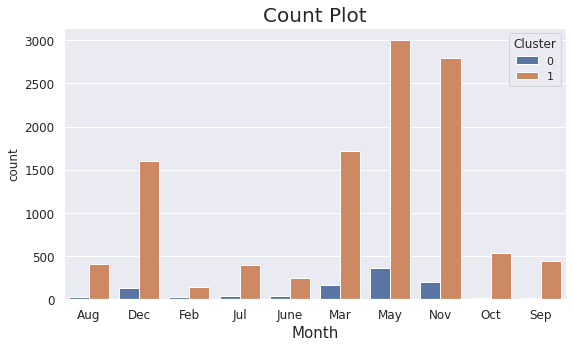

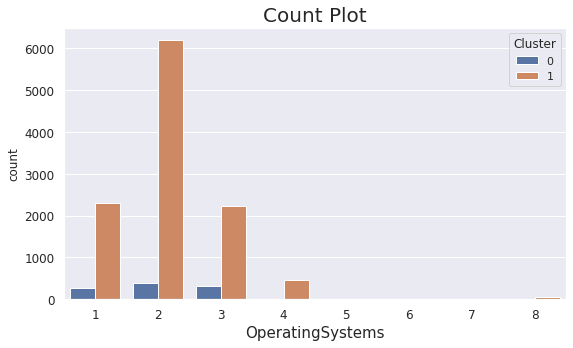

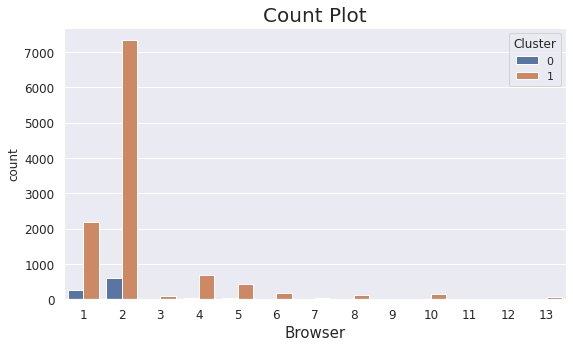

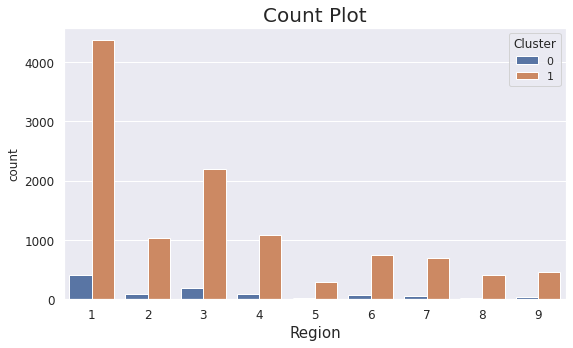

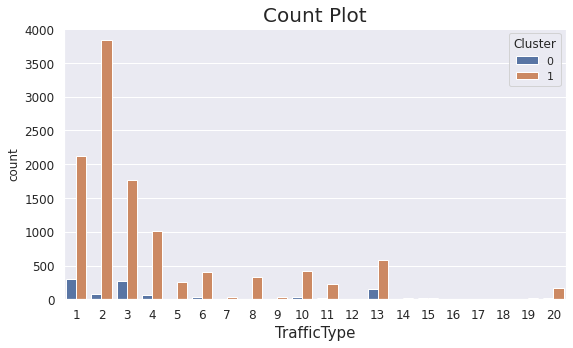

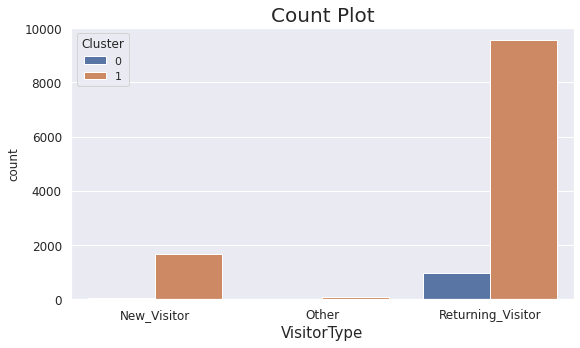

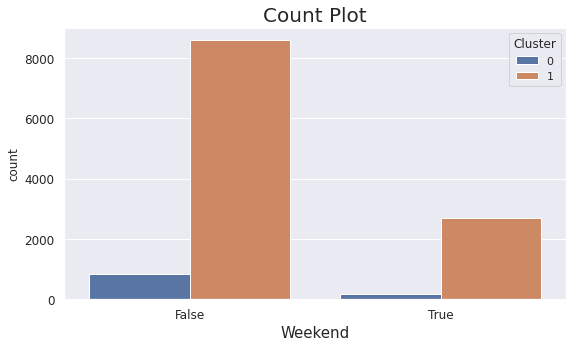

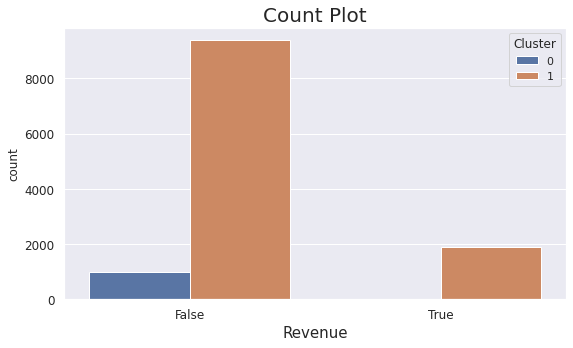

In [ ]:
#month
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='Month',hue="Cluster")
ax.set_xlabel('Month', fontsize = 15)
ax.tick_params(labelsize=12)

#operating system
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='OperatingSystems',hue="Cluster")
ax.set_xlabel('OperatingSystems', fontsize = 15)
ax.tick_params(labelsize=12)

#browser
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='Browser',hue="Cluster")
ax.set_xlabel('Browser', fontsize = 15)
ax.tick_params(labelsize=12)

#region
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='Region',hue="Cluster")
ax.set_xlabel('Region', fontsize = 15)
ax.tick_params(labelsize=12)

#traffic type
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='TrafficType',hue="Cluster")
ax.set_xlabel('TrafficType', fontsize = 15)
ax.tick_params(labelsize=12)

#visitor type
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='VisitorType',hue="Cluster")
ax.set_xlabel('VisitorType', fontsize = 15)
ax.tick_params(labelsize=12)

#weekend
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='Weekend',hue="Cluster")
ax.set_xlabel('Weekend', fontsize = 15)
ax.tick_params(labelsize=12)

#revenue
fig = plt.figure(figsize=(9, 5))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df_new, x='Revenue',hue="Cluster")
ax.set_xlabel('Revenue', fontsize = 15)
ax.tick_params(labelsize=12)

berdasarkan grafik diatas :
- target customer lebih banyak mengunjungi web shop online pada bulan Mei
- target customer lebih banyak mengunjungi web shop online menggunakan sistem operasi ke-2
- target customer lebih banyak mengunjungi web shop online menggunakan jenis browser ke-2
- target customer pada daerah ke-1 lebih banyak mengunjungi web shop online
- target customer lebih banyak mengunjungi web shop online berdasarkan sumber nomor 2
- target customer lebih banyak berasal dari returning visitor
- target customer justru banyak mengunjungi web shop online pada weekdays
- target customer justru lebih banyak tidak menyelesaikan kunjungan web dengan transaksi